##Importing Libraries

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

##Data Preprocessing
##Training Image Preprocessing

In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


##Validation

In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [5]:
training_set

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [6]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  ...

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     

##Building Model

In [7]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [8]:
model = Sequential()

##Building Convolutional Layer

In [9]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [10]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [11]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [12]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [13]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [14]:
model.add(Dropout(0.25))

In [15]:
model.add(Flatten())

In [16]:
model.add(Dense(units=1500,activation='relu'))

In [17]:
model.add(Dropout(0.4))

In [18]:
#Output Layer
model.add(Dense(units=38,activation='softmax'))

Compiling and Training Phase

In [19]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

##Training model

In [21]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 [==============================] - 3399s 2s/step - loss: 1.1266 - accuracy: 0.6624 - val_loss: 0.4444 - val_accuracy: 0.8601
Epoch 2/10
2197/2197 [==============================] - 14011s 6s/step - loss: 0.4095 - accuracy: 0.8699 - val_loss: 0.2302 - val_accuracy: 0.9243
Epoch 3/10
2197/2197 [==============================] - 2582s 1s/step - loss: 0.2462 - accuracy: 0.9198 - val_loss: 0.2609 - val_accuracy: 0.9173
Epoch 4/10
2197/2197 [==============================] - 3352s 2s/step - loss: 0.1705 - accuracy: 0.9448 - val_loss: 0.1514 - val_accuracy: 0.9529
Epoch 5/10
2197/2197 [==============================] - 1916s 871ms/step - loss: 0.1310 - accuracy: 0.9568 - val_loss: 0.2070 - val_accuracy: 0.9360
Epoch 6/10
2197/2197 [==============================] - 2679s 1s/step - loss: 0.1019 - accuracy: 0.9664 - val_loss: 0.1255 - val_accuracy: 0.9624
Epoch 7/10
2197/2197 [==============================] - 2769s 1s/step - loss: 0.0811 - accuracy: 0.9730 - val_loss: 0.15

##ModelEvaluation

In [ ]:
train_loss, train_acc = model.evaluate(training_set)

 911/2197 [===========>..................] - ETA: 13:07 - loss: 4.4822 - accuracy: 0.0261   

In [23]:
print(train_loss, train_acc)

0.04054629057645798 0.9877942800521851


##Evaluation on Validation Set

In [24]:
val_loss,val_acc = model.evaluate(validation_set)

550/550 [==============================] - 253s 461ms/step - loss: 0.1312 - accuracy: 0.9623


In [25]:
print(val_loss,val_acc)

0.13116766512393951 0.9623264074325562


##Saving Model

In [ ]:
model.save("trained_model.h5")

In [ ]:
model.save("trained_model.keras")

In [28]:
training_history.history

{'loss': [1.1265642642974854,
  0.40954911708831787,
  0.24620330333709717,
  0.17053569853305817,
  0.1309739500284195,
  0.10188581049442291,
  0.08111301809549332,
  0.07759146392345428,
  0.06153358519077301,
  0.0536196231842041],
 'accuracy': [0.662365734577179,
  0.8699480891227722,
  0.9198378324508667,
  0.9448466897010803,
  0.9568390250205994,
  0.966427206993103,
  0.9730421900749207,
  0.97507643699646,
  0.9806387424468994,
  0.9831851720809937],
 'val_loss': [0.4444429576396942,
  0.23019231855869293,
  0.2609107494354248,
  0.15143939852714539,
  0.20699967443943024,
  0.12553367018699646,
  0.15435585379600525,
  0.12041979283094406,
  0.15177275240421295,
  0.13116763532161713],
 'val_accuracy': [0.8601183891296387,
  0.9243113994598389,
  0.9173116087913513,
  0.9529364705085754,
  0.9359776973724365,
  0.9623833298683167,
  0.9530503153800964,
  0.9631231427192688,
  0.95652174949646,
  0.9623264074325562]}

##Recording history in json format

In [31]:
training_history.history['accuracy']

[0.662365734577179,
 0.8699480891227722,
 0.9198378324508667,
 0.9448466897010803,
 0.9568390250205994,
 0.966427206993103,
 0.9730421900749207,
 0.97507643699646,
 0.9806387424468994,
 0.9831851720809937]

In [29]:
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

##Accuracy Visualization

In [2]:
training_history.history['val_accuracy']

NameError: name 'training_history' is not defined

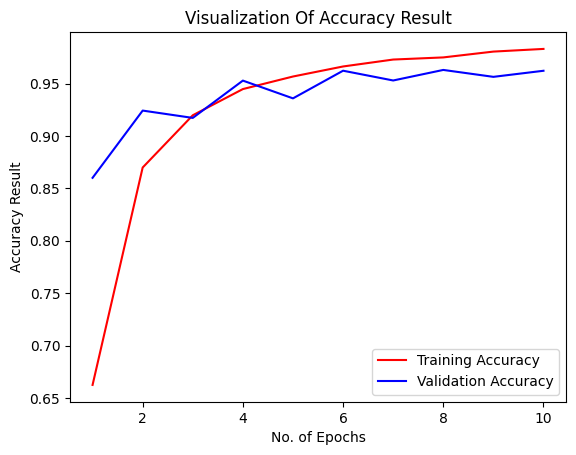

In [35]:
epochs=[i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization Of Accuracy Result")
plt.legend()
plt.show()

In [36]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [37]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [39]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

17572/17572 [==============================] - 727s 41ms/step


(array([[9.9999750e-01, 8.2386600e-07, 4.5391993e-10, ..., 9.4556730e-13,
         5.6407076e-13, 6.3186821e-12],
        [9.9999809e-01, 7.5194180e-07, 1.4098216e-09, ..., 1.0679797e-12,
         3.9072903e-12, 2.6586885e-11],
        [9.9993575e-01, 2.8841194e-08, 7.2228317e-09, ..., 1.5544478e-12,
         5.0887589e-11, 1.0619620e-08],
        ...,
        [3.0232776e-08, 1.3717935e-09, 5.1928544e-07, ..., 1.6449281e-09,
         4.7134990e-10, 9.9990427e-01],
        [1.7328321e-11, 6.1117680e-13, 2.3295090e-11, ..., 6.3892153e-13,
         4.7979779e-13, 1.0000000e+00],
        [3.4925886e-18, 5.0481814e-19, 8.5576872e-18, ..., 3.8201145e-19,
         7.8837410e-18, 1.0000000e+00]], dtype=float32),
 (17572, 38))

In [40]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [41]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [42]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories 

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [43]:
Y_true = tf.argmax(true_categories, axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [51]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.93      0.95       504
                                 Apple___Black_rot       0.98      1.00      0.99       497
                          Apple___Cedar_apple_rust       0.99      0.93      0.96       440
                                   Apple___healthy       0.94      0.98      0.96       502
                               Blueberry___healthy       0.99      0.96      0.98       454
          Cherry_(including_sour)___Powdery_mildew       1.00      0.99      0.99       421
                 Cherry_(including_sour)___healthy       1.00      0.96      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.92      0.94      0.93       410
                       Corn_(maize)___Common_rust_       1.00      0.91      0.95       477
               Corn_(maize)___Northern_Leaf_Blight       0.96      0.94      0.

In [50]:
from sklearn.metrics import confusion_matrix,classification_report

In [49]:
cm = confusion_matrix(Y_true,predicted_categories)
cm.shape

(38, 38)

In [52]:
cm

array([[469,   6,   0, ...,   0,   1,   0],
       [  0, 495,   0, ...,   0,   0,   0],
       [  2,   0, 411, ...,   0,   1,   0],
       ...,
       [  0,   0,   0, ..., 485,   0,   0],
       [  0,   0,   0, ...,   0, 448,   0],
       [  0,   0,   0, ...,   0,   0, 481]], dtype=int64)

##Confusion Matrix

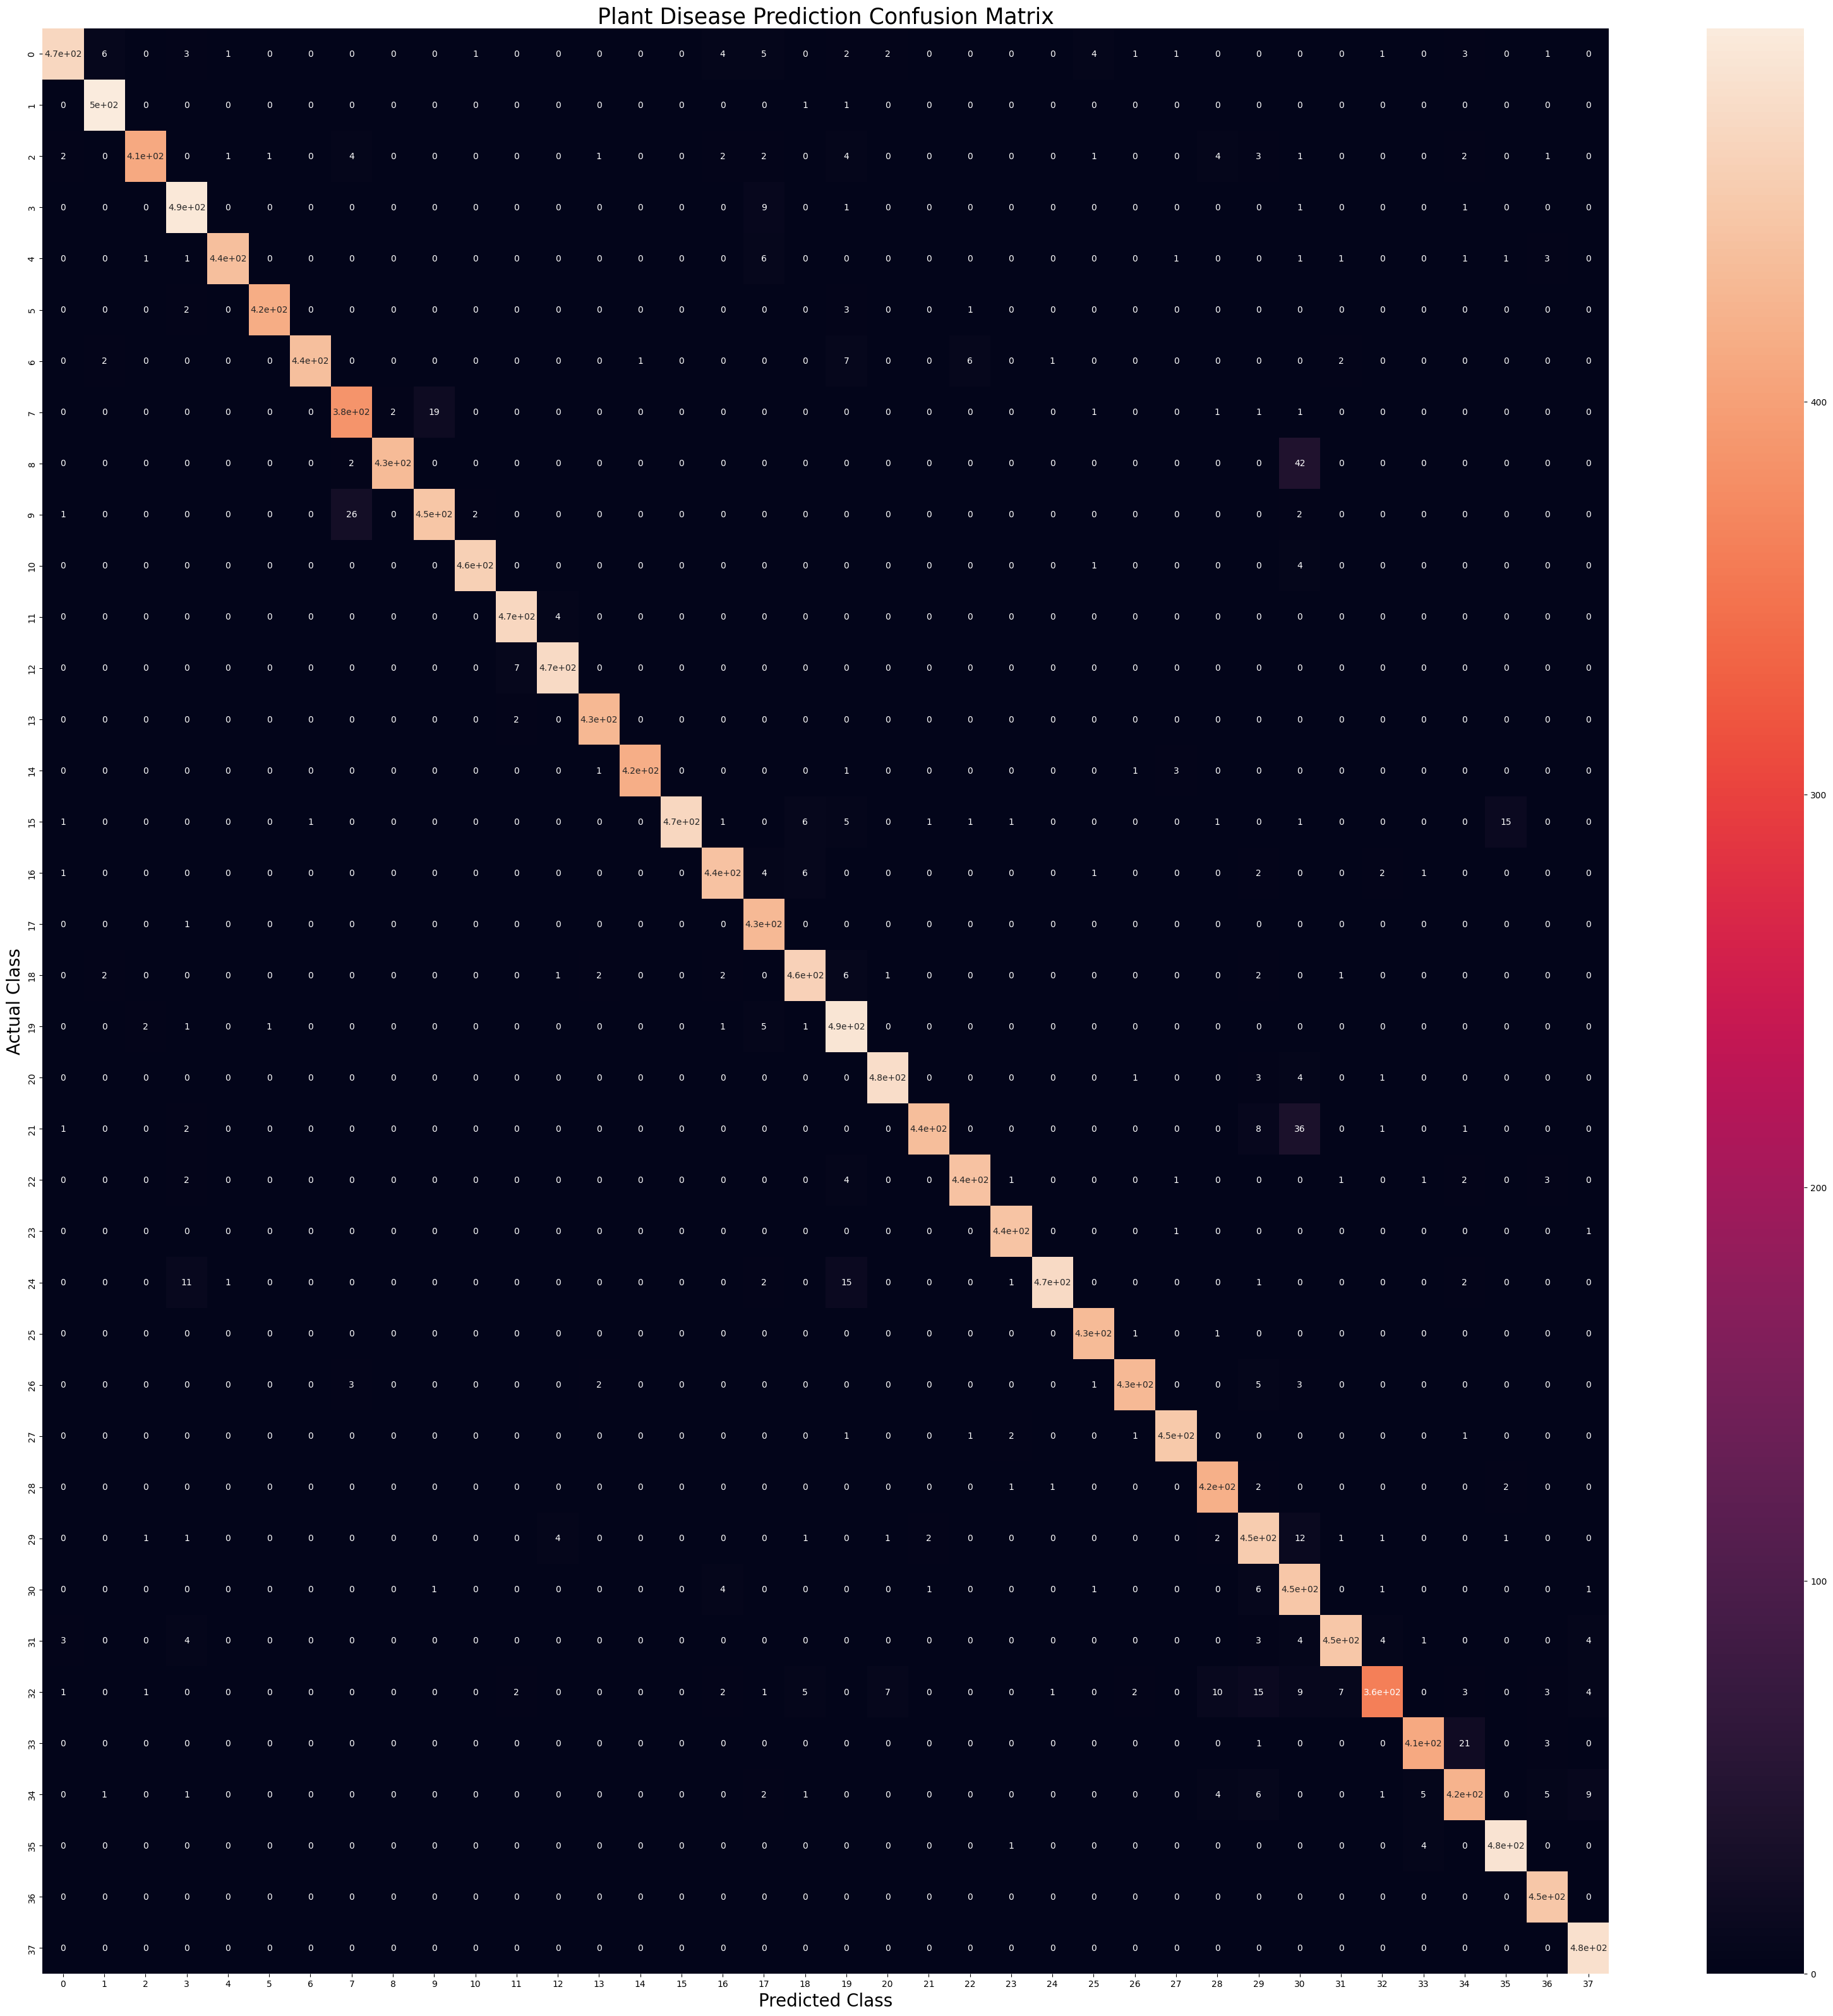

In [53]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()